In [1]:
import os
import sys

# Add the project's root directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import random

import numpy as np
import torch

from GP_comp.GP import generate_grids
from SGLD_v7 import SgldBayesianRegression as V7, select_significant_voxels
from models.neural_network import NeuralNetwork
from simulate_single_modality import simulate_data
from utils import generate_linear_data, plot_mse, plot_sigma_squared

# Set random seed for reproducibility
torch.manual_seed(42)
random.seed(42)
np.random.seed(42)

In [2]:
in_feature = 3
# Generate synthetic data
X, y, true_weights, true_bias = generate_linear_data(n=1000, in_features=in_feature, noise_std=1.0)

a_beta = 2.0
b_beta = 1.0
model=NeuralNetwork()

In [3]:
# Run SGLD
c = V7(
    model=model,
    step_size=0.0001,
    num_epochs=6000,
    burn_in_epochs=250,
    batch_size=100,
)

In [4]:
c.train(X, y)
inputs = torch.ones(in_feature)
print(f'true_weight={true_weights} true_bias={true_bias}')
print(f'X={inputs} Y(predicted)={c.predict(inputs)} Y(expected)={sum(true_weights) + true_bias}')

Epoch 1/6000
Epoch 101/6000
Epoch 201/6000
Epoch 301/6000
Epoch 401/6000
Epoch 501/6000
Epoch 601/6000
Epoch 701/6000
Epoch 801/6000
Epoch 901/6000
Epoch 1001/6000
Epoch 1101/6000
Epoch 1201/6000
Epoch 1301/6000
Epoch 1401/6000
Epoch 1501/6000
Epoch 1601/6000
Epoch 1701/6000
Epoch 1801/6000
Epoch 1901/6000
Epoch 2001/6000
Epoch 2101/6000
Epoch 2201/6000
Epoch 2301/6000
Epoch 2401/6000
Epoch 2501/6000
Epoch 2601/6000
Epoch 2701/6000
Epoch 2801/6000
Epoch 2901/6000
Epoch 3001/6000
Epoch 3101/6000
Epoch 3201/6000
Epoch 3301/6000
Epoch 3401/6000
Epoch 3501/6000
Epoch 3601/6000
Epoch 3701/6000
Epoch 3801/6000
Epoch 3901/6000
Epoch 4001/6000
Epoch 4101/6000
Epoch 4201/6000
Epoch 4301/6000
Epoch 4401/6000
Epoch 4501/6000
Epoch 4601/6000
Epoch 4701/6000
Epoch 4801/6000
Epoch 4901/6000
Epoch 5001/6000
Epoch 5101/6000
Epoch 5201/6000
Epoch 5301/6000
Epoch 5401/6000
Epoch 5501/6000
Epoch 5601/6000
Epoch 5701/6000
Epoch 5801/6000
Epoch 5901/6000
true_weight=tensor([1., 2., 3.]) true_bias=-1.0
pred

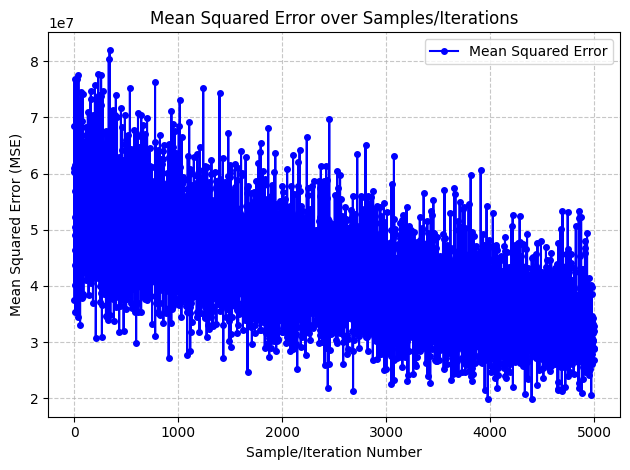

In [5]:
plot_mse(c,30000, 35000)

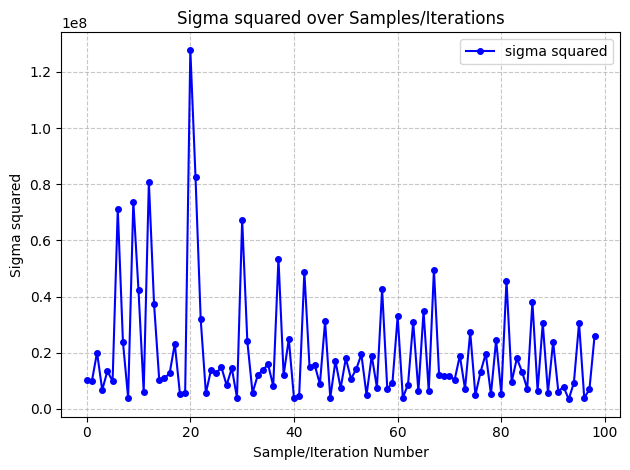

In [6]:
plot_sigma_squared(c, -100, -1)